<a href="https://colab.research.google.com/github/Subramanian1990/Deep-Learning/blob/master/0429_PyTorchCNN_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [3]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [18]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images)

print(images.shape)

print(images[1].shape)
print(labels[1].item())

tensor([[[[0.9686, 0.9569, 0.9569,  ..., 0.9529, 0.9529, 0.9529],
          [0.9922, 0.9725, 0.9686,  ..., 0.9608, 0.9608, 0.9608],
          [1.0000, 0.9804, 0.9804,  ..., 0.9608, 0.9608, 0.9608],
          ...,
          [1.0000, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
          [1.0000, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
          [1.0000, 0.9843, 0.9882,  ..., 0.9882, 0.9882, 0.9882]],

         [[0.9961, 0.9804, 0.9765,  ..., 0.9725, 0.9725, 0.9725],
          [1.0000, 0.9882, 0.9882,  ..., 0.9804, 0.9804, 0.9804],
          [1.0000, 0.9922, 0.9922,  ..., 0.9804, 0.9804, 0.9804],
          ...,
          [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

         [[0.9686, 0.9569, 0.9529,  ..., 0.9490, 0.9490, 0.9490],
          [0.9804, 0.9686, 0.9647,  ..., 0.9569, 0.9569, 0.9569],
          [0.9922, 0.9765, 0.9765,  ..., 0

## Visualise data

In [10]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [11]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [12]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


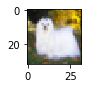

In [13]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

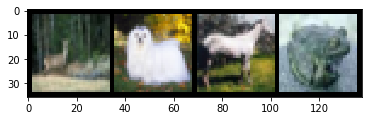

deer dog horse frog


In [15]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net = FirstCNN()

In [25]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [26]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [27]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


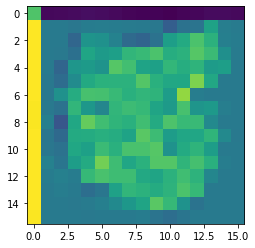

In [28]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [30]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

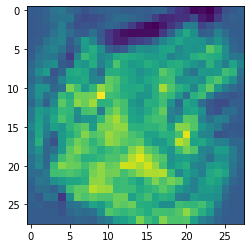

In [31]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [33]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

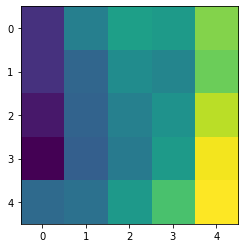

In [34]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [36]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [37]:
print(out)

tensor([[-8.8902e-02,  7.7778e-02, -2.1008e-03, -6.0325e-02, -1.4978e-03,
         -1.2723e-01,  4.9761e-02,  8.5099e-02,  5.6283e-02,  3.5015e-02],
        [-9.1364e-02,  8.4754e-02, -1.4204e-02, -4.5564e-02,  1.1268e-02,
         -1.3971e-01,  4.2551e-02,  6.8691e-02,  6.4102e-02,  1.5848e-02],
        [-9.8047e-02,  7.6134e-02, -1.1450e-02, -4.0253e-02, -1.3386e-02,
         -1.4807e-01,  4.6401e-02,  6.0735e-02,  6.0663e-02,  2.8471e-03],
        [-9.3969e-02,  8.7320e-02, -8.4013e-03, -3.6505e-02,  6.2444e-03,
         -1.3794e-01,  4.4782e-02,  6.9055e-02,  5.6061e-02, -4.6032e-05]],
       grad_fn=<AddmmBackward>)


In [38]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([7, 1, 1, 1])


## Training LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [39]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),lr=0.01,weight_decay=0.01)

Streaming output truncated to the last 5000 lines.
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Siz

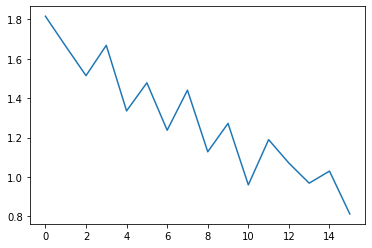

CPU times: user 6min 42s, sys: 8.87 s, total: 6min 51s
Wall time: 6min 50s


In [43]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [53]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),lr=0.01,weight_decay=0.0001)

In [65]:
%%time
max_epochs = 30

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Streaming output truncated to the last 5000 lines.
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Siz

In [66]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
to

## Basic Visualisation

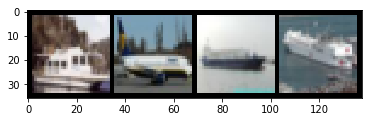

In [0]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [0]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [0]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

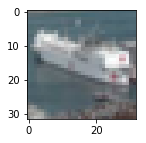

In [0]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


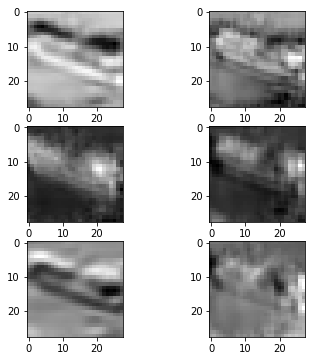

In [0]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss - Completed final loss more or less same and time as well
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation -> done but accuracy has reduced improve accuracy
* Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. Download and visualise MNIST data.
* But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. Train and find optimised test accuracy.